In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('/Users/orion/RDaly2023/mcmc-fitting/Zhu_Rakshit_flagged_final367.csv', 
                 header=0, usecols=[0,1,4,5,8,9])

df.rename(columns={'Log(L_5 GHz)':'logR', 'Log(2 keV)': 'logX'}, inplace=True)

In [3]:
df

,SDSS Name,z_1,logR,logX,logMBH,e_logMBH
0,000442.18+000023.3,1.008,32.09,26.91,9.281283,0.031152
1,000622.60-000424.4,1.038,34.94,27.32,8.823198,0.059579
2,001646.54-005151.7,2.243,32.66,26.36,9.011771,0.240900
3,001910.95+034844.6,2.022,32.91,26.54,8.696172,0.037866
4,003054.63+045908.4,2.201,33.81,26.59,8.688945,0.189143
...,...,...,...,...,...,...
362,222852.60-075346.6,0.638,33.12,26.83,8.546475,0.068004
363,231156.65+015324.5,2.257,32.54,26.34,8.784155,0.118988
364,232734.73+002234.0,1.494,33.56,26.96,9.709295,0.111279
365,234808.62+020725.8,1.872,32.84,26.61,9.817211,0.082521


In [4]:
x = df[['logX','logMBH']]
y = df['logR']

df['logX_err'] = df['logX'].std()
yerr = np.sqrt(df['logX_err']**2 + df['e_logMBH']**2)

In [ ]:
x1 = x.to_numpy()[:,0]   
x2 = x.to_numpy()[:,1]
print(x1)
print(x2)

# works same as my way--

#x0 = df[['logX','logMBH']].values.reshape(-1,2)   #reshape not really needed here
#xn = x0[:, 0]
#yn = x0[:, 1]
#print(xn)
#print(yn)

In [23]:
import statsmodels.api as sm

x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
prediction = model.predict(x) 

#model.summary()
print(prediction)

# convert to array--
#prediction.to_numpy()



0      33.214973
1      33.816575
2      32.595787
3      32.884232
4      32.947263
         ...    
362    33.272716
363    32.619554
364    33.185522
365    32.732122
366    33.032022
Length: 367, dtype: float64


In [5]:
def func(X,Y,M1,M2,C):
    return M1*X + M2*Y + C

In [6]:
x_pred = np.linspace(25, 40, 50)
y_pred = np.linspace(5, 20, 50) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

z_pred = np.zeros(2500)
for i in range(0,2500):
        z_pred[i]=func(model_viz[i,0],model_viz[i,1],1.239,-0.229,1.999)

z_pred

array([31.829     , 32.20828571, 32.58757143, ..., 46.22042857,
       46.59971429, 46.979     ])

In [7]:
z_pred.shape

(2500,)

In [80]:
z_pred[:100]

array([31.829     , 32.20828571, 32.58757143, 32.96685714, 33.34614286,
       33.72542857, 34.10471429, 34.484     , 34.86328571, 35.24257143,
       35.62185714, 36.00114286, 36.38042857, 36.75971429, 37.139     ,
       37.51828571, 37.89757143, 38.27685714, 38.65614286, 39.03542857,
       39.41471429, 39.794     , 40.17328571, 40.55257143, 40.93185714,
       41.31114286, 41.69042857, 42.06971429, 42.449     , 42.82828571,
       43.20757143, 43.58685714, 43.96614286, 44.34542857, 44.72471429,
       45.104     , 45.48328571, 45.86257143, 46.24185714, 46.62114286,
       47.00042857, 47.37971429, 47.759     , 48.13828571, 48.51757143,
       48.89685714, 49.27614286, 49.65542857, 50.03471429, 50.414     ,
       31.75889796, 32.13818367, 32.51746939, 32.8967551 , 33.27604082,
       33.65532653, 34.03461224, 34.41389796, 34.79318367, 35.17246939,
       35.5517551 , 35.93104082, 36.31032653, 36.68961224, 37.06889796,
       37.44818367, 37.82746939, 38.2067551 , 38.58604082, 38.96

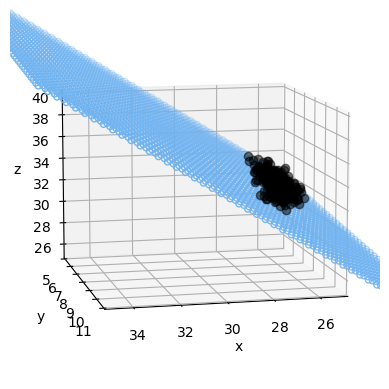

In [110]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x0 = x.to_numpy()[:,0] 
y0 = x.to_numpy()[:,1]
z0 = y


ax.plot(x0, y0, z0, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), z_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([25,35])
ax.set_ylim([5,11])
ax.set_zlim([25,40])

ax.view_init(elev=10, azim=77)

In [98]:
pred_x = xx_pred.flatten()[xx_pred.flatten()<32]
pred_y = yy_pred.flatten()[:1150]
pred_z = z_pred[:1150]

In [99]:
print(pred_x.shape)
print(pred_y.shape)
print(pred_z.shape)

(1150,)
(1150,)
(1150,)


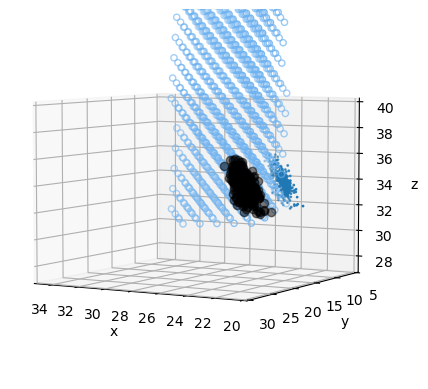

In [104]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x0 = x.to_numpy()[:,0] 
y0 = x.to_numpy()[:,1]
z0 = y


ax.plot(x0, y0, z0, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(pred_x, pred_y, pred_z, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.scatter(x0, z0, s=1, zs=0, zdir='y')
ax.scatter(y0, z0, s=1, zs=0, zdir='x')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([20,35])
ax.set_ylim([5,30])
ax.set_zlim([27,40])

ax.view_init(elev=5, azim=120)

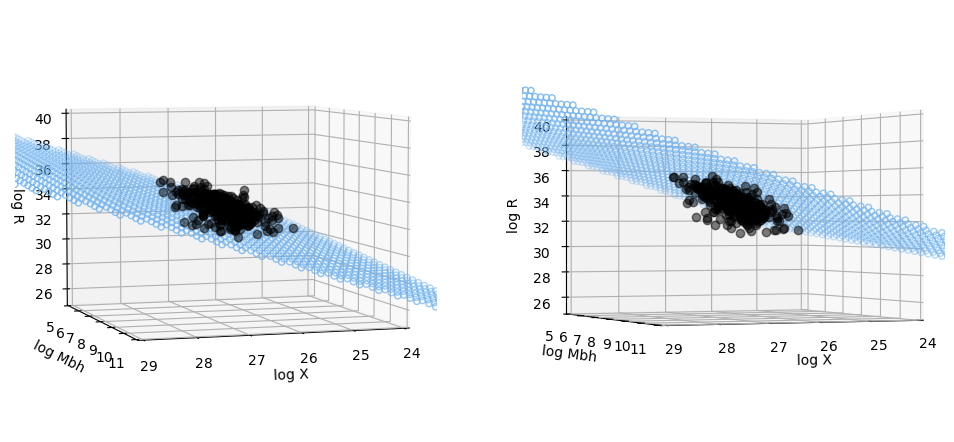

In [130]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

axes = [ax1, ax2]

for ax in axes:
    ax.plot(x0, y0, z0, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), z_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('log X')
    ax.set_ylabel('log Mbh')
    ax.set_zlabel('log R')
    ax.set_xlim([24,29])
    ax.set_ylim([5,11])
    ax.set_zlim([25,40])


x0 = x.to_numpy()[:,0] 
y0 = x.to_numpy()[:,1]
z0 = y


ax1.view_init(elev=5, azim=72)
ax2.view_init(elev=0, azim=67)


plt.savefig('3D_fit_plot.png')